# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,Built-up Area (sqft),Value ($1000)
0,665.0,161.0
1,442.0,83.0
2,302.0,53.0
3,336.0,57.0
4,673.0,152.0


In [14]:
X = df["Built-up Area (sqft)"]
y = df["Value ($1000)"]

144    452.0
145    453.0
146    566.0
147    483.0
148    552.0
Name: Built-up Area (sqft), dtype: float64

In [12]:
# random_state acts similar to setting the seed for np
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
X.shape,X_train.shape,X_test.shape

((149,), (119,), (30,))

In [13]:
X_train.values

array([691., 468., 393., 315., 524., 459., 496., 484., 673., 690., 444.,
       627., 366., 360., 261., 690., 536., 445., 385., 463., 444., 348.,
       324., 665., 542., 650., 412., 630., 335., 639., 523., 393., 570.,
       231., 529., 504., 676., 497., 652., 518., 358., 470., 673., 453.,
       467., 495., 625., 493., 651., 483., 605., 416., 594., 509., 346.,
       481., 416., 361., 392., 419., 497., 540., 453., 407., 561., 448.,
       420., 444., 585., 336., 525., 598., 301., 488., 407., 408., 416.,
       302., 540., 300., 488., 487., 455., 409., 321., 428., 566., 670.,
       633., 608., 663., 552., 210., 284., 589., 661., 582., 479., 620.,
       673., 396., 262., 538., 442., 472., 543., 330., 489., 486., 406.,
       431., 436., 552., 250., 640., 233., 410., 362., 359.])

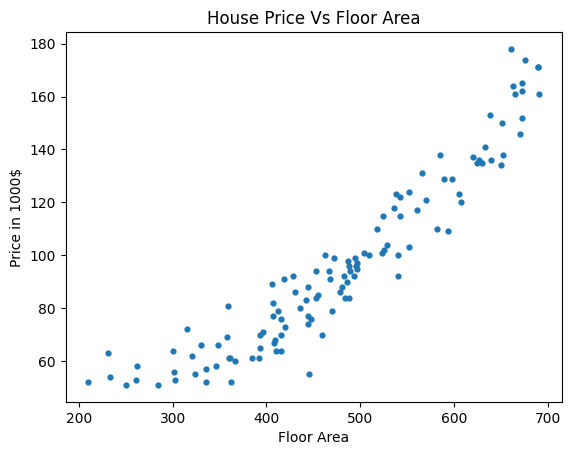

In [15]:
plt.scatter(X_train.values,y_train.values, s= 12)
plt.title("House Price Vs Floor Area")
plt.xlabel("Floor Area")
plt.ylabel("Price in 1000$")
plt.show()

In [19]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

LinearRegression()

In [20]:
print(lr.intercept_)

[-29.65146489]


In [21]:
print(lr.coef_)

[[0.2640654]]


In [22]:
#floor area  = 300 sqft
lr.predict([[300]])

array([[49.56815401]])

In [23]:
# floor area = 500sqft
lr.predict([[500]])

array([[102.38123328]])

In [14]:
X_train

22     691.0
15     468.0
65     393.0
11     315.0
42     524.0
       ...  
71     640.0
106    233.0
14     410.0
92     362.0
102    359.0
Name: Built-up Area (sqft), Length: 119, dtype: float64

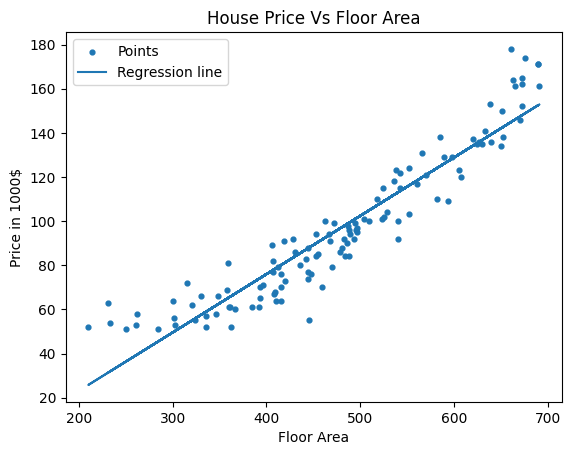

In [25]:
plt.scatter(X_train.values,y_train.values, s= 12, label = "Points")
y_pred = lr.predict(X_train.values.reshape(-1,1))
plt.plot(X_train.values,y_pred, label="Regression line")
plt.title("House Price Vs Floor Area")
plt.xlabel("Floor Area")
plt.ylabel("Price in 1000$")
plt.legend()
plt.show()

In [27]:
mse = mean_squared_error(y_train,y_pred)
rmse = mean_squared_error(y_train,y_pred,squared=False)
r2 = r2_score(y_train,y_pred)
print(mse)
print(rmse)
print(r2)

130.57148429157493
11.426788012892116
0.8827389714759885


In [30]:
y_pred_test = lr.predict(X_test.values.reshape(-1,1))
mse = mean_squared_error(y_test,y_pred_test)
rmse = mean_squared_error(y_test,y_pred_test,squared=False)
r2 = r2_score(y_test,y_pred_test)
print(mse)
print(rmse)
print(r2)

108.43679388107715
10.413298895214577
0.9229207556091985


# Polynomial Regression

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
arr = np.arange(1,5).reshape(-1,1)
arr

array([[1],
       [2],
       [3],
       [4]])

In [34]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(arr)

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

In [ ]:
# x --> degree 2
# x^0 , x^1 & x^2

In [35]:
poly = PolynomialFeatures(degree=3)
poly.fit_transform(arr)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [23]:
X_train[:5]

22    691.0
15    468.0
65    393.0
11    315.0
42    524.0
Name: Built-up Area (sqft), dtype: float64

In [38]:
poly = PolynomialFeatures(degree=2)
X_train_transformed = poly.fit_transform(X_train.values.reshape(-1,1))

In [39]:
X_train_transformed[:5]

array([[1.00000e+00, 6.91000e+02, 4.77481e+05],
       [1.00000e+00, 4.68000e+02, 2.19024e+05],
       [1.00000e+00, 3.93000e+02, 1.54449e+05],
       [1.00000e+00, 3.15000e+02, 9.92250e+04],
       [1.00000e+00, 5.24000e+02, 2.74576e+05]])

In [40]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_transformed,y_train)
print(poly_reg.intercept_)
print(poly_reg.coef_)
# coefficients for each of the features

70.9116140454665
[ 0.         -0.18658297  0.00047343]


In [42]:
#floor area = 300 sqft
data_transformed = poly.transform([[300]])
# [1, 300, 300^2]
# (1 * 0) + (300 * -0.18658297) + (300^2 * 0.00047343) + 70.9116140454665
pred_price = poly_reg.predict(data_transformed)
print(pred_price)

[57.54571784]


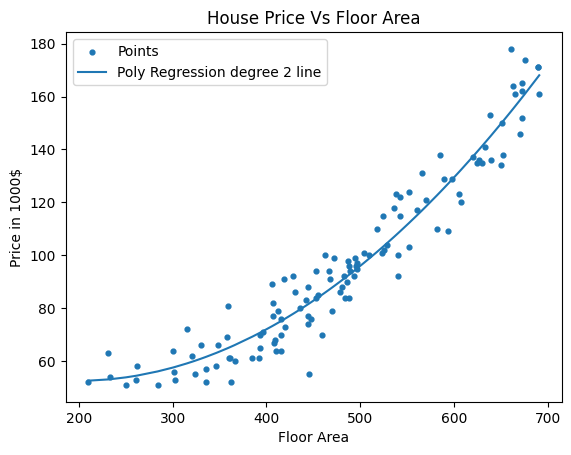

In [55]:
plt.scatter(X_train.values,y_train.values, s= 12, label = "Points")
y_pred = poly_reg.predict(X_train_transformed)

# plt.plot(X_train.values,y_pred, label="Poly Regression degree 2 line")
# Need to zip the arrays together to sort on X then unzip
sorted_zip = sorted(zip(X_train.values,y_pred))
# * is the unpacking operator provided for zipped tuples
X_train_sorted,y_pred_sorted = zip(*sorted_zip)
plt.plot(X_train_sorted,y_pred_sorted, label="Poly Regression degree 2 line")
plt.title("House Price Vs Floor Area")
plt.xlabel("Floor Area")
plt.ylabel("Price in 1000$")
plt.legend()
plt.show()

In [56]:
mse = mean_squared_error(y_train,y_pred)
rmse = mean_squared_error(y_train,y_pred,squared=False)
r2 = r2_score(y_train,y_pred)
print(mse)
print(rmse)
print(r2)

72.63872657680335
8.522835594847724
0.9347660644643525


In [57]:
X_test_transformed = poly.transform(X_test.values.reshape(-1,1))
y_pred_test = poly_reg.predict(X_test_transformed)
mse = mean_squared_error(y_test,y_pred_test)
rmse = mean_squared_error(y_test,y_pred_test,squared=False)
r2 = r2_score(y_test,y_pred_test)
print(mse)
print(rmse)
print(r2)

41.281697532474276
6.425083465020068
0.9706560666441097


# Pipeline
Combine both polynomial transformation and linear regression in one pipeline

In [58]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=2))
    , ("polynomial_regression", LinearRegression())
    ])

pipe.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('polynomial_regression', LinearRegression())])

In [63]:
pipe.predict([[300]])
# pipe.named_steps['polynomial_regression'].coef_

array([[ 0.        , -0.18658297,  0.00047343]])

In [64]:
y_pred = pipe.predict(X_train.values.reshape(-1,1))
print(mean_squared_error(y_train,y_pred,squared = False))
print(r2_score(y_train,y_pred))

y_pred_test = pipe.predict(X_test.values.reshape(-1,1))
print(mean_squared_error(y_test,y_pred_test,squared = False))
print(r2_score(y_test,y_pred_test))

8.522835594847724
0.9347660644643525
6.425083465020068
0.9706560666441097


# Cross Validation
Check to see what the actual performance of the model looks like

In [65]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [69]:
from sklearn.model_selection import cross_val_score
# cv = 3 means that the training data will be tested on 3 different folds of data
scores = cross_val_score(pipe,X_train,y_train, cv = 3, scoring = "neg_root_mean_squared_error")
neg_rmse = scores.mean()
-neg_rmse

8.615541039554328

In [71]:
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [72]:
scores = cross_val_score(pipe,X_test,y_test, cv = 3, scoring = "neg_root_mean_squared_error")
neg_rmse = scores.mean()
-neg_rmse

6.800888112088135

In [73]:
scores = cross_val_score(pipe,X_test,y_test, cv = 3, scoring = "r2")
r2 = scores.mean()
r2

0.9657808215430984